In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import json, gzip
from tqdm import tqdm
from collections import Counter

In [30]:
def open_dataframe(df_dir: str, printable: bool = False) -> pd.DataFrame:
    metadata_df = pd.read_json(df_dir, lines=True)
    if printable is True:
        print(metadata_df.head())
    return metadata_df


def dump_dataframe(df_dir: str, df_data: pd.DataFrame) -> None:
    json_str = df_data.to_json(orient="records", lines=True)
    with gzip.open(df_dir, "wt", encoding="utf-8") as f:
        f.write(json_str)
    print(f"successfully dumped into file {df_dir}")

## Current Data

In [31]:
file_dir = '/home/zxia15/data_zxia15/russian-semantics/work/filtered11_metadata_russian_documents.jsonl.gz'

df = open_dataframe(file_dir)
print(len(df))
df.head()

25516


,htid,russian text ratio,year,form,year_copywright,content_length,normalized_author,normalized_title
0,mdp.39015009128698,98.944547,1941.0,None,1909,241396,"Merezhkovsky, Dmitry Sergeyevich","Gogolʹ; tvorchestvo, zhiznʹ i religiia."
1,mdp.39015006976008,99.458652,1928.0,nonfiction,1922,100497,"Aikhenvalʹd, IU. I.",Poety i poetessy /
2,mdp.39015039267706,99.433717,1937.0,nonfiction,1922,82703,"Zamiatin, Evgenii Ivanovich",Robert Maier /
3,uc1.$b624626,97.934253,1934.0,nonfiction,1922,370214,"Bely, Andrey",Ofeira : putevye zametki
4,njp.32101017212554,99.056794,1920.0,nonfiction,1918,417670,"Shchepkin, V. N.",Uchebnik russkoi paleografii /


In [32]:
df[df['year_copywright'] < 1600]

,htid,russian text ratio,year,form,year_copywright,content_length,normalized_author,normalized_title
5689,uc1.$b60707,95.724986,NaN,nonfiction,1074,1152928,"Bzhelenko, L. K.",Paleozoologiia SSSR :


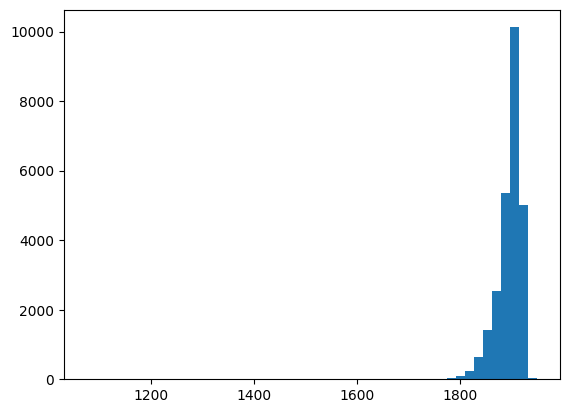

In [33]:
plt.hist(df['year_copywright'], bins=50)
plt.show()

In [34]:
print(f"there are {len(df[df['content_length'] >= 1e4])} instances in total,\n" +
    f"among those {len(df[df['content_length'] >= 1e5])} instances with larger than 1e5 words,\n" + 
    f"{len(df[df['content_length'] >= 5e5])} instances with larger than 5e5 words,\n" +
    f"{len(df[df['content_length'] >= 1e6])} instances with larger than 1e6 words,\n")

there are 25516 instances in total,
among those 20338 instances with larger than 1e5 words,
8756 instances with larger than 5e5 words,
3379 instances with larger than 1e6 words,



In [35]:
df[df['normalized_author']  == 'Zamiatin, Evgenii Ivanovich']

,htid,russian text ratio,year,form,year_copywright,content_length,normalized_author,normalized_title
2,mdp.39015039267706,99.433717,1937.0,nonfiction,1922,82703,"Zamiatin, Evgenii Ivanovich",Robert Maier /
330,mdp.39015030697489,99.308866,1937.0,nonfiction,1924,101876,"Zamiatin, Evgenii Ivanovich",Obshchestvo pochetnykh zvonarei :
1174,mdp.39015030697463,99.535463,1937.0,None,1923,214268,"Zamiatin, Evgenii Ivanovich",Na kulichkakh :
3230,uc1.$b605611,98.551734,1937.0,nonfiction,1922,67912,"Zamiatin, Evgenii Ivanovich",Ogni sviatogo Dominika.
13194,umn.31951t00034283z,98.987283,1937.0,fiction,1922,46624,"Zamiatin, Evgenii Ivanovich",Bolʹshim dietiam skazki /
20383,uc1.b003017043,99.299511,1937.0,nonfiction,1922,251903,"Zamiatin, Evgenii Ivanovich",Ostrovitiane :


('Tolstoy, Leo', 'Pushkin, Aleksandr Sergeevich', 'Gorky, Maksim', 'Nemirovich-Danchenko, Vasilii   Ivanovich', 'Kareev, Nikolai Ivanovich', 'Amfiteatrov, Aleksandr', 'Pokrovskii, Vladimir Ivanovich.', 'Turgenev, Ivan Sergeevich', 'Gogolð, Nikolaæi Vasilðevich', 'Merezhkovsky, Dmitry Sergeyevich', 'Saltykov, Mikhail Evgrafovich', 'Chekhov, Anton Pavlovich', 'Chirikov, E. N.', 'Korolenko, Vladimir Galaktionovich', 'Lenin, Vladimir Ilʹich', 'Andreyev, Leonid', 'Pogodin, Mikhail Petrovich', 'Dostoyevsky, Fyodor', 'Kropotkin, Petr Alekseevich', 'Plekhanov, Georgii Valentinovich')


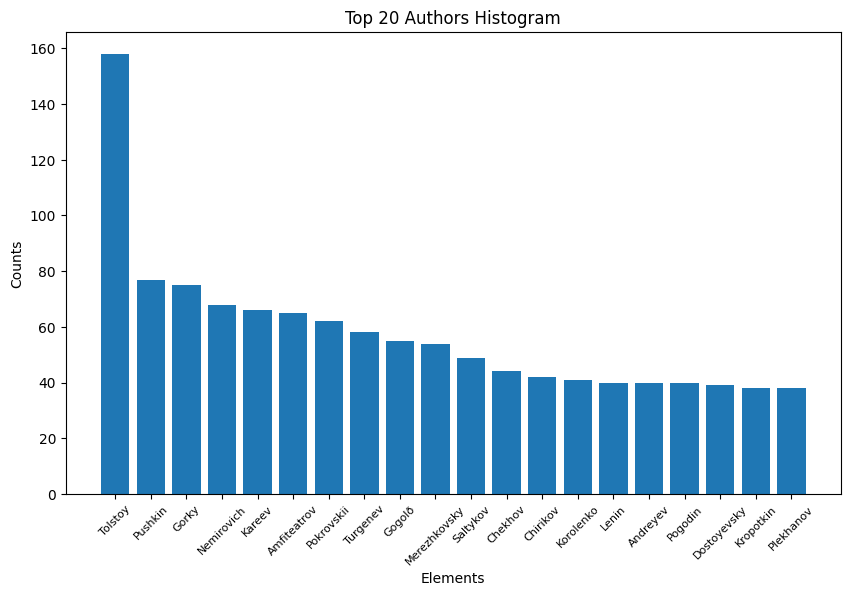

In [37]:
counter = Counter(df['normalized_author'].tolist())

# Get the top k elements (e.g., top 2)
k = 20
top_k = counter.most_common(k)

# Separate the elements and their counts
elements, counts = zip(*top_k)
print(elements)
elements = [element.split(', ')[0] for element in elements]
elements = [element.split('-')[0] for element in elements]

plt.figure(figsize=(10, 6))

# Plot the histogram
plt.bar(elements, counts)
plt.xlabel('Elements')
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('Counts')
plt.title(f'Top {k} Authors Histogram')
plt.show()

## Problem with copywright years

In [84]:
str(df[df['normalized_author'] == 'Gogolð, Nikolaæi Vasilðevich']['year'].value_counts())

'year\n1852.0    53\n1902.0     1\n1909.0     1\nName: count, dtype: int64'

In [86]:
print('under indicated written year number, we have unique years, distributed as below:' +
      f"Pushkin: {str(df[df['normalized_author'] == 'Pushkin, Aleksandr Sergeevich']['year'].value_counts())}\n" + 
      f"Gogol: {str(df[df['normalized_author'] == 'Gogolð, Nikolaæi Vasilðevich']['year'].value_counts())}\n" + 
      f"Tolstoy: {str(df[df['normalized_author'] == 'Tolstoy, Leo']['year'].value_counts())}\n" +
      f"Dostoevsky: {str(df[df['normalized_author'] == 'Dostoyevsky, Fyodor']['year'].value_counts())}\n")

under indicated written year number, we have unique years, distributed as below:Pushkin: year
1837.0    75
1888.0     1
1904.0     1
Name: count, dtype: int64
Gogol: year
1852.0    53
1902.0     1
1909.0     1
Name: count, dtype: int64
Tolstoy: year
1910.0    153
1897.0      1
1913.0      1
1892.0      1
1900.0      1
1912.0      1
Name: count, dtype: int64
Dostoevsky: year
1881.0    38
1888.0     1
Name: count, dtype: int64



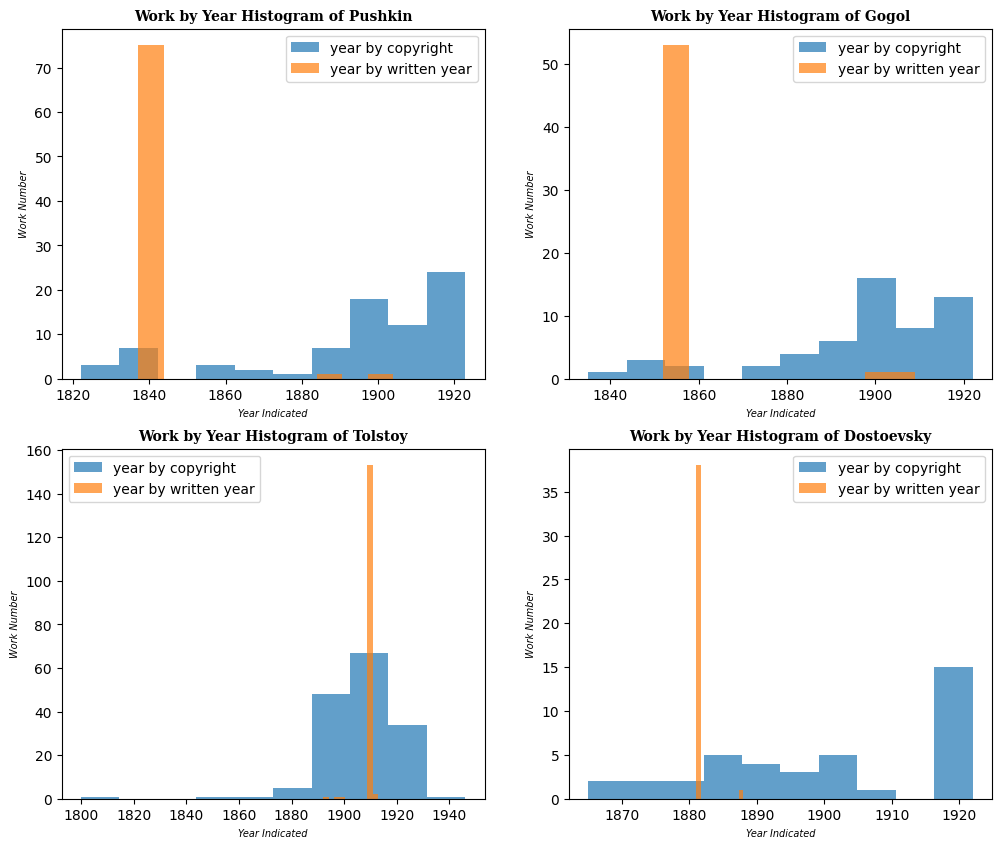

In [73]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(df[df['normalized_author'] == 'Pushkin, Aleksandr Sergeevich']['year_copywright'], alpha=0.7, label='year by copyright')
axs[0, 0].hist(df[df['normalized_author'] == 'Pushkin, Aleksandr Sergeevich']['year'], alpha=0.7, label='year by written year')
axs[0, 0].set_xlabel('Year Indicated', fontdict={'fontsize': 7, 'fontstyle': 'italic', 'family': 'sans-serif'})
axs[0, 0].set_ylabel('Work Number', fontdict={'fontsize': 7, 'fontstyle': 'italic', 'family': 'sans-serif'})
axs[0, 0].set_title('Work by Year Histogram of Pushkin', fontdict={'fontsize': 10, 'fontweight': 'bold', 'family': 'serif'})
axs[0, 0].legend()

axs[0, 1].hist(df[df['normalized_author'] == 'Gogolð, Nikolaæi Vasilðevich']['year_copywright'], alpha=0.7, label='year by copyright')
axs[0, 1].hist(df[df['normalized_author'] == 'Gogolð, Nikolaæi Vasilðevich']['year'], alpha=0.7, label='year by written year')
axs[0, 1].set_xlabel('Year Indicated', fontdict={'fontsize': 7, 'fontstyle': 'italic', 'family': 'sans-serif'})
axs[0, 1].set_ylabel('Work Number', fontdict={'fontsize': 7, 'fontstyle': 'italic', 'family': 'sans-serif'})
axs[0, 1].set_title('Work by Year Histogram of Gogol', fontdict={'fontsize': 10, 'fontweight': 'bold', 'family': 'serif'})
axs[0, 1].legend()

axs[1, 0].hist(df[df['normalized_author'] == 'Tolstoy, Leo']['year_copywright'], alpha=0.7, label='year by copyright')
axs[1, 0].hist(df[df['normalized_author'] == 'Tolstoy, Leo']['year'], alpha=0.7, label='year by written year')
axs[1, 0].set_xlabel('Year Indicated', fontdict={'fontsize': 7, 'fontstyle': 'italic', 'family': 'sans-serif'})
axs[1, 0].set_ylabel('Work Number', fontdict={'fontsize': 7, 'fontstyle': 'italic', 'family': 'sans-serif'})
axs[1, 0].set_title('Work by Year Histogram of Tolstoy', fontdict={'fontsize': 10, 'fontweight': 'bold', 'family': 'serif'})
axs[1, 0].legend()

axs[1, 1].hist(df[df['normalized_author'] == 'Dostoyevsky, Fyodor']['year_copywright'], alpha=0.7, label='year by copyright')
axs[1, 1].hist(df[df['normalized_author'] == 'Dostoyevsky, Fyodor']['year'], alpha=0.7, label='year by written year')
axs[1, 1].set_xlabel('Year Indicated', fontdict={'fontsize': 7, 'fontstyle': 'italic', 'family': 'sans-serif'})
axs[1, 1].set_ylabel('Work Number', fontdict={'fontsize': 7, 'fontstyle': 'italic', 'family': 'sans-serif'})
axs[1, 1].set_title('Work by Year Histogram of Dostoevsky', fontdict={'fontsize': 10, 'fontweight': 'bold', 'family': 'serif'})
axs[1, 1].legend()

plt.show()

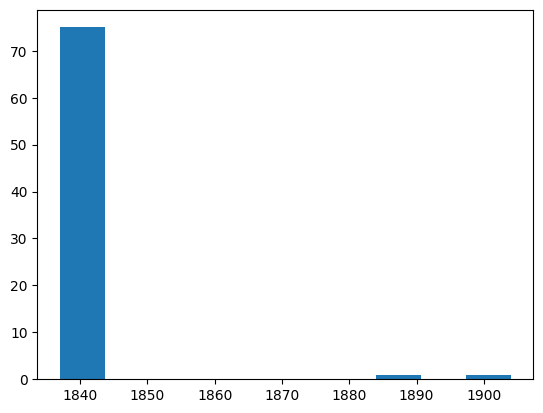

In [40]:
plt.hist(df[df['normalized_author'] == 'Pushkin, Aleksandr Sergeevich']['year'])
plt.show()

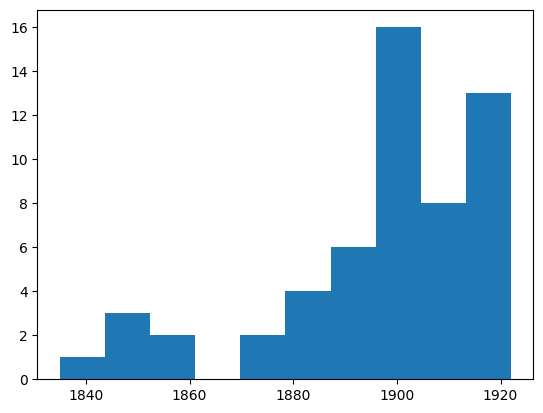

In [39]:
plt.hist(df[df['normalized_author'] == 'Gogolð, Nikolaæi Vasilðevich']['year_copywright'])
plt.show()

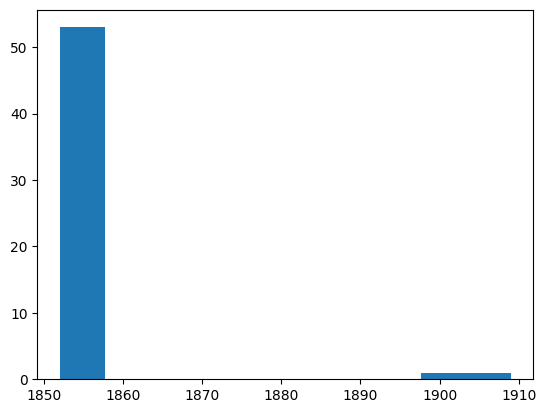

In [42]:
plt.hist(df[df['normalized_author'] == 'Gogolð, Nikolaæi Vasilðevich']['year'])
plt.show()

In [ ]:
Tolstoy, Leo

## IF Cutting all instances from 1900 - 1950

In [43]:
df_pre1900 = df[df['year_copywright'] <= 1900]
print(len(df_pre1900))
df_pre1900.head()

11902


,htid,russian text ratio,year,form,year_copywright,content_length,normalized_author,normalized_title
7,mdp.39015005463578,95.631582,1862.0,nonfiction,1845,685710,"Zubrzycki, Djonizy",Rys historyi narodu Ruskiego w Galicyi i hiera...
9,mdp.39015026702046,91.738584,NaN,nonfiction,1900,345160,"Keussler, Friedrich von.",Der Ausgang der ersten russischen Herrschaft i...
12,hvd.hnbid5,98.463456,NaN,nonfiction,1855,244918,"Karashevich, Platon.",Ocherk istorii pravoslavnoi tserkvi na Volyni /
14,mdp.39015065251178,99.111010,NaN,nonfiction,1885,196329,"Skriabin, N.",Politicheskiia i ekonomicheskiia sviedeniia o ...
24,mdp.39015063050820,99.808412,1912.0,fiction,1898,236513,"Mamin-Sibiriak, D. N.",Legendy /


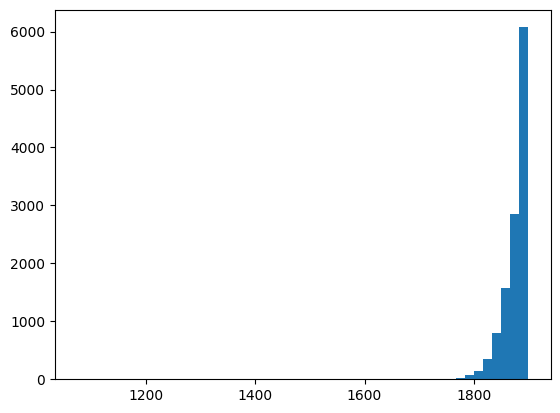

In [44]:
plt.hist(df_pre1900['year_copywright'], bins=50)
plt.show()

In [45]:
print(f"there are {len(df_pre1900[df_pre1900['content_length'] >= 1e4])} instances in total,\n" +
    f"among those {len(df_pre1900[df_pre1900['content_length'] >= 1e5])} instances with larger than 1e5 words,\n" + 
    f"{len(df_pre1900[df_pre1900['content_length'] >= 5e5])} instances with larger than 5e5 words,\n" +
    f"{len(df_pre1900[df_pre1900['content_length'] >= 1e6])} instances with larger than 1e6 words,\n")

there are 11902 instances in total,
among those 9880 instances with larger than 1e5 words,
4518 instances with larger than 5e5 words,
1801 instances with larger than 1e6 words,



('Pogodin, Mikhail Petrovich', 'Saltykov, Mikhail Evgrafovich', 'Turgenev, Ivan Sergeevich', 'Pushkin, Aleksandr Sergeevich', 'Tolstoy, Leo', 'Filaret', 'Sreznevskii, Izmail Ivanovich', 'Grot, IA. K.', 'Kareev, Nikolai Ivanovich', 'Nemirovich-Danchenko, Vasilii   Ivanovich', 'Makarii', 'Belinsky, Vissarion Grigoryevich', 'Lermontov, Mikhail IUrʹevich', 'Nazarʹeva, K. V.', 'Dostoyevsky, Fyodor', 'Lukhmanova, N. A.', 'Kostomarov, Nikolai Ivanovich', 'Titov, Andrei Aleksandrovich', 'Gogolð, Nikolaæi Vasilðevich', 'Pypin, Aleksandr Nikolaevich')


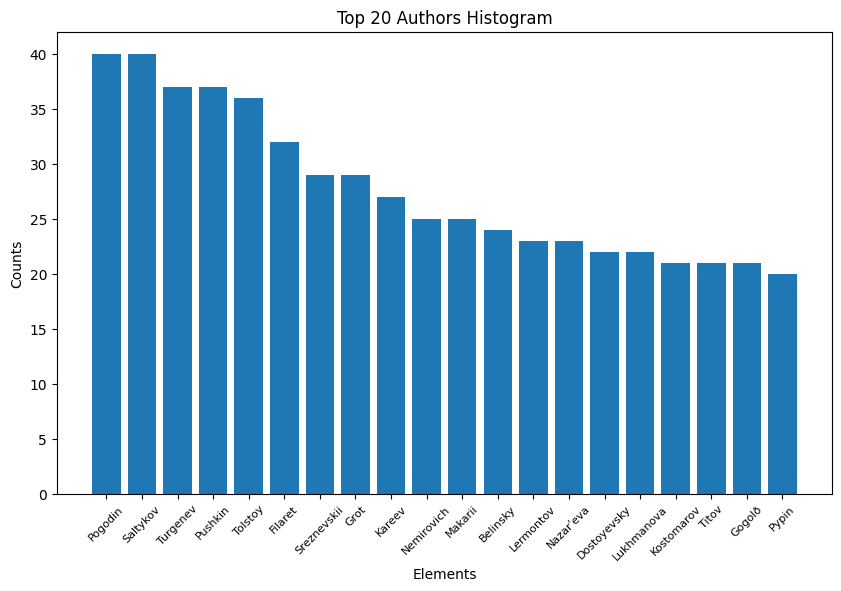

In [46]:
counter = Counter(df_pre1900['normalized_author'].tolist())

# Get the top k elements (e.g., top 2)
k = 20
top_k = counter.most_common(k)

# Separate the elements and their counts
elements, counts = zip(*top_k)
print(elements)
elements = [element.split(', ')[0] for element in elements]
elements = [element.split('-')[0] for element in elements]

plt.figure(figsize=(10, 6))

# Plot the histogram
plt.bar(elements, counts)
plt.xlabel('Elements')
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('Counts')
plt.title(f'Top {k} Authors Histogram')
plt.show()

## Trials with year data

In [47]:
non_nan_year_df = df[~df['year'].isna()].copy()
print(len(non_nan_year_df))
non_nan_year_df['year'] = non_nan_year_df['year'].map(lambda x : int(x))
non_nan_year_df.head()

17712


,htid,russian text ratio,year,form,year_copywright,content_length,normalized_author,normalized_title
0,mdp.39015009128698,98.944547,1941,None,1909,241396,"Merezhkovsky, Dmitry Sergeyevich","Gogolʹ; tvorchestvo, zhiznʹ i religiia."
1,mdp.39015006976008,99.458652,1928,nonfiction,1922,100497,"Aikhenvalʹd, IU. I.",Poety i poetessy /
2,mdp.39015039267706,99.433717,1937,nonfiction,1922,82703,"Zamiatin, Evgenii Ivanovich",Robert Maier /
3,uc1.$b624626,97.934253,1934,nonfiction,1922,370214,"Bely, Andrey",Ofeira : putevye zametki
4,njp.32101017212554,99.056794,1920,nonfiction,1918,417670,"Shchepkin, V. N.",Uchebnik russkoi paleografii /


In [48]:
non_nan_year_df[non_nan_year_df['year'] < 1500]

,htid,russian text ratio,year,form,year_copywright,content_length,normalized_author,normalized_title
1763,mdp.39015026722911,99.240431,1400,None,1896,69769,Agrefenii,Khozhdenie arkhimandrit Agrefen'ia obieteli Pr...
1764,mdp.39015026722937,98.961848,1122,None,1885,240219,Daniil,Zhit'e i khozhen'e Danila rus'kyia zemli igume...
9080,njp.32101075722528,95.516209,1122,nonfiction,1864,382317,Daniil,Puteshestvie igumena Daniila po Sviatoi zemle ...
12580,uc1.c2810382,98.534105,1420,nonfiction,1906,364051,"TSamblak, Grigorii",Iz istorii slavianskoi propoviedi v Moldavii :
14579,uc1.c3435631,96.108246,1189,nonfiction,1906,43044,Kulin,Gramota bana Kulina /
19954,chi.76647591,98.714888,1122,nonfiction,1885,538852,Daniil,"Zhitʹe i khozhenʹe Danila, Rusʹskyia zemli igu..."
19970,chi.091401451,94.514468,1122,nonfiction,1864,372680,Daniil,Puteshestvie igumena Daniila po Sviatoi Zemlie...
20856,chi.090256023,98.984164,1496,nonfiction,1900,244967,Savva,Poslanie Inoka Savvy na zhidov i na eretiki 14...


In [49]:
non_nan_year_df[(non_nan_year_df['year'] > 1500) & (non_nan_year_df['year'] < 1600)]

,htid,russian text ratio,year,form,year_copywright,content_length,normalized_author,normalized_title
758,mdp.39015014562246,97.170412,1583,nonfiction,1914,320400,"Kurbskii, Andrei Mikhailovich",Sochineniia.
2013,mdp.39015074215578,98.860447,1583,None,1913,157805,"Kurbskii, Andrei Mikhailovich",Pisʹma kniazia A.M. Kurbskago k raznym litsam.
6047,nnc1.0043094031,99.475651,1556,nonfiction,1860,1458511,Maximus,Sochineniia prepodobnago Maksima Greka /
6708,nnc1.cu60600268,96.361333,1554,nonfiction,1864,107996,"Savva, Bp. pf Krutitsk",Zhitie prepodobnago Iosifa Volokolamskago /
7276,hvd.hw6eiu,98.541246,1583,nonfiction,1868,1033743,"Kurbskii, Andrei Mikhailovich",Skazaniia kniazia Kurbskago.
11179,uc1.b4878354,98.786721,1566,nonfiction,1887,252813,Silʹvestr,Domostroi.
14065,uc1.$c56665,97.996700,1566,nonfiction,1908,504879,Silʹvestr,"Domostroi,"
14108,uc1.$c134361,98.150131,1584,nonfiction,1914,63245,"Arsenii, Vysokii",Ukazets knigokhranitelia Spaso-Prilutskago mon...
14292,uc1.c3343374,92.808354,1584,nonfiction,1886,23642,Ivan,Stikhiry polozhennyia na kriukovyia noty /
14578,uc1.c3435610,98.060410,1561,nonfiction,1913,26037,Isaiia,K literaturnoi dieiatelʹnosti mnikha Kamiachan...


In [51]:
non_nan_year_df[(non_nan_year_df['year'] > 1600) & (non_nan_year_df['year'] < 1700)]['normalized_author'].unique()

array(['Avvakum Petrovich', 'Zheliabuzhskii, Ivan Afanasʹev',
       'Innokentii Gizel', 'Aleksei Mikhailovich',
       'Griboedov, Fedor Akimovich', 'Shusherin, Ivan Kornilʹevich',
       'Ioakim', 'Simon Azarʹin', 'Nikon', 'Filaret', 'Timofeev, Ivan',
       'Kotoshikhin, Grigorii', 'Kotoshikhin, Grigorii Karpovich',
       'Cervantes Saavedra, Miguel de', 'Medviedev, Silʹvestr',
       'Kotov, Fedot Afanasʹevich', 'Avraamii', 'Germogen'], dtype=object)

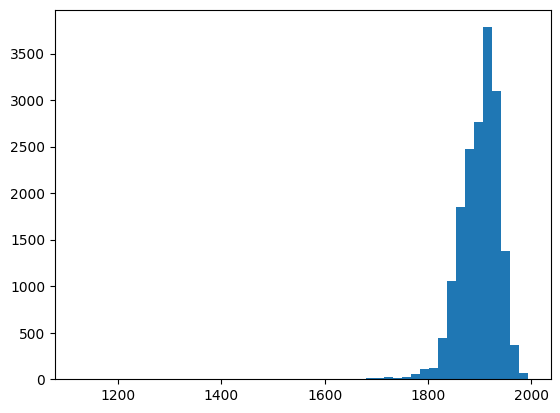

In [52]:
plt.hist(non_nan_year_df['year'], bins=50)
plt.show()

In [55]:
df_non_nan_pre1900 = non_nan_year_df[non_nan_year_df['year_copywright'] <= 1900]
print(len(df_non_nan_pre1900))
df_non_nan_pre1900.head()

8536


,htid,russian text ratio,year,form,year_copywright,content_length,normalized_author,normalized_title
7,mdp.39015005463578,95.631582,1862,nonfiction,1845,685710,"Zubrzycki, Djonizy",Rys historyi narodu Ruskiego w Galicyi i hiera...
24,mdp.39015063050820,99.808412,1912,fiction,1898,236513,"Mamin-Sibiriak, D. N.",Legendy /
38,mdp.39015058694046,98.036320,1829,nonfiction,1815,561554,"Lodii, Petr",Logicheskiia nastavleniia rukovodstvuiushchiia...
43,mdp.39015007027611,99.337073,1885,nonfiction,1862,145051,"Pryzhov, Ivan Grigorʹevich",Nishchie na sviatoi Rusi;
44,mdp.39015068256760,95.286719,1896,nonfiction,1891,62429,"Stolietov, A. G.",Sofʹia Vasilʹevna Kovalevskaia.


In [56]:
df_non_nan_pre1910 = non_nan_year_df[non_nan_year_df['year_copywright'] <= 1910]
print(len(df_non_nan_pre1910))
df_non_nan_pre1910.head()

12610


,htid,russian text ratio,year,form,year_copywright,content_length,normalized_author,normalized_title
0,mdp.39015009128698,98.944547,1941,None,1909,241396,"Merezhkovsky, Dmitry Sergeyevich","Gogolʹ; tvorchestvo, zhiznʹ i religiia."
5,mdp.39015058498059,99.504724,1937,None,1908,221601,"Walecki, Henryk",Wspołczesne obrazy ideowe wsrod Zydow.
7,mdp.39015005463578,95.631582,1862,nonfiction,1845,685710,"Zubrzycki, Djonizy",Rys historyi narodu Ruskiego w Galicyi i hiera...
8,mdp.39015073372735,99.786704,1954,nonfiction,1906,47251,"Veselovskii, B. B.",Kakoe miestnoe samoupravlenie nuzhno narodu /
15,mdp.39015009150841,98.071367,1934,nonfiction,1910,1216642,"Bely, Andrey",Simvolizm ;


('Tolstoy, Leo', 'Pushkin, Aleksandr Sergeevich', 'Gorky, Maksim', 'Nemirovich-Danchenko, Vasilii   Ivanovich', 'Kareev, Nikolai Ivanovich', 'Amfiteatrov, Aleksandr', 'Turgenev, Ivan Sergeevich', 'Gogolð, Nikolaæi Vasilðevich', 'Merezhkovsky, Dmitry Sergeyevich', 'Saltykov, Mikhail Evgrafovich', 'Chekhov, Anton Pavlovich', 'Chirikov, E. N.', 'Korolenko, Vladimir Galaktionovich', 'Lenin, Vladimir Ilʹich', 'Andreyev, Leonid', 'Pogodin, Mikhail Petrovich', 'Dostoyevsky, Fyodor', 'Plekhanov, Georgii Valentinovich', 'Kropotkin, Petr Alekseevich', 'Likhachev, Nikolai Petrovich')


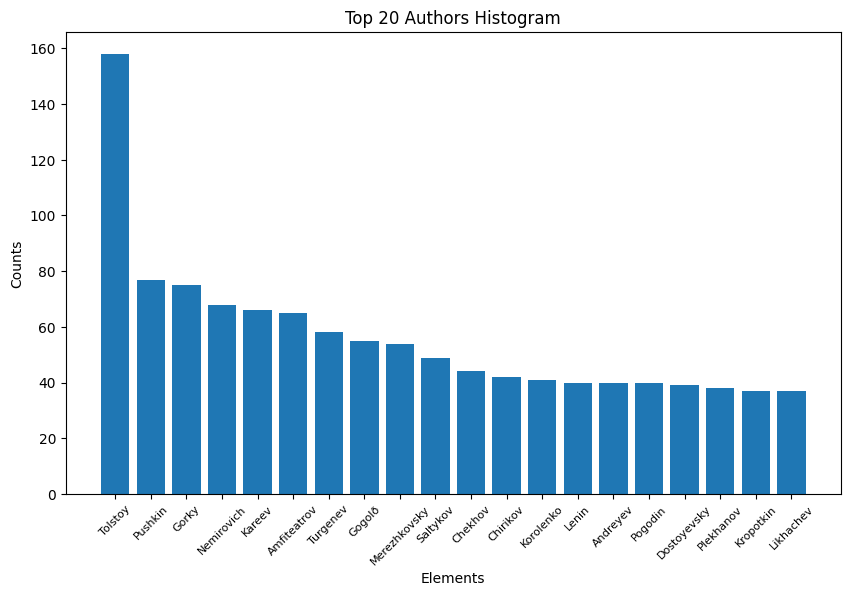

In [61]:
counter = Counter(non_nan_year_df['normalized_author'].tolist())

# Get the top k elements (e.g., top 2)
k = 20
top_k = counter.most_common(k)

# Separate the elements and their counts
elements, counts = zip(*top_k)
print(elements)
elements = [element.split(', ')[0] for element in elements]
elements = [element.split('-')[0] for element in elements]

plt.figure(figsize=(10, 6))

# Plot the histogram
plt.bar(elements, counts)
plt.xlabel('Elements')
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('Counts')
plt.title(f'Top {k} Authors Histogram')
plt.show()

('Pogodin, Mikhail Petrovich', 'Saltykov, Mikhail Evgrafovich', 'Turgenev, Ivan Sergeevich', 'Pushkin, Aleksandr Sergeevich', 'Tolstoy, Leo', 'Filaret', 'Sreznevskii, Izmail Ivanovich', 'Grot, IA. K.', 'Kareev, Nikolai Ivanovich', 'Nemirovich-Danchenko, Vasilii   Ivanovich', 'Belinsky, Vissarion Grigoryevich', 'Lermontov, Mikhail IUrʹevich', 'Makarii', 'Dostoyevsky, Fyodor', 'Lukhmanova, N. A.', 'Kostomarov, Nikolai Ivanovich', 'Titov, Andrei Aleksandrovich', 'Gogolð, Nikolaæi Vasilðevich', 'Pypin, Aleksandr Nikolaevich', 'Likhachev, Nikolai Petrovich')


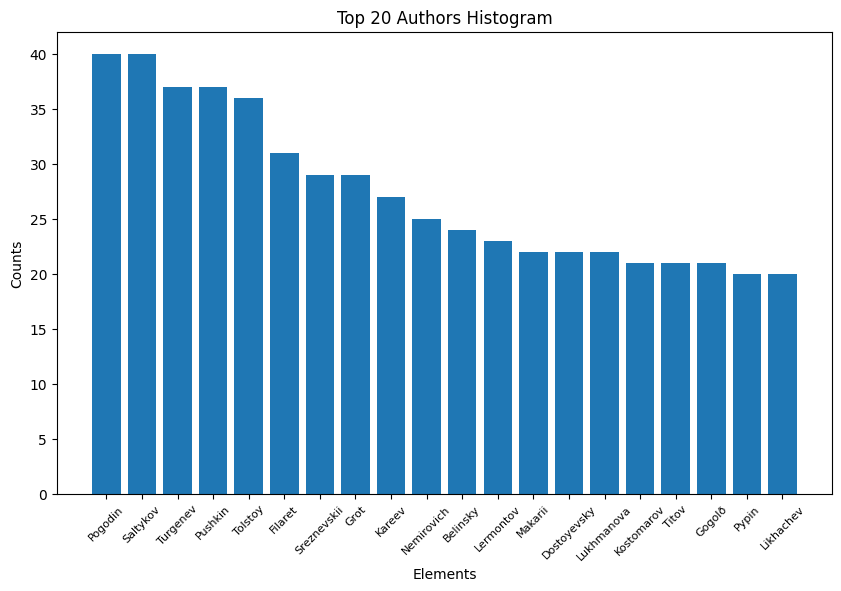

In [59]:
counter = Counter(df_non_nan_pre1900['normalized_author'].tolist())

# Get the top k elements (e.g., top 2)
k = 20
top_k = counter.most_common(k)

# Separate the elements and their counts
elements, counts = zip(*top_k)
print(elements)
elements = [element.split(', ')[0] for element in elements]
elements = [element.split('-')[0] for element in elements]

plt.figure(figsize=(10, 6))

# Plot the histogram
plt.bar(elements, counts)
plt.xlabel('Elements')
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('Counts')
plt.title(f'Top {k} Authors Histogram')
plt.show()

('Pogodin, Mikhail Petrovich', 'Saltykov, Mikhail Evgrafovich', 'Turgenev, Ivan Sergeevich', 'Pushkin, Aleksandr Sergeevich', 'Tolstoy, Leo', 'Filaret', 'Sreznevskii, Izmail Ivanovich', 'Grot, IA. K.', 'Kareev, Nikolai Ivanovich', 'Nemirovich-Danchenko, Vasilii   Ivanovich', 'Belinsky, Vissarion Grigoryevich', 'Lermontov, Mikhail IUrʹevich', 'Makarii', 'Dostoyevsky, Fyodor', 'Lukhmanova, N. A.', 'Kostomarov, Nikolai Ivanovich', 'Titov, Andrei Aleksandrovich', 'Gogolð, Nikolaæi Vasilðevich', 'Pypin, Aleksandr Nikolaevich', 'Likhachev, Nikolai Petrovich')


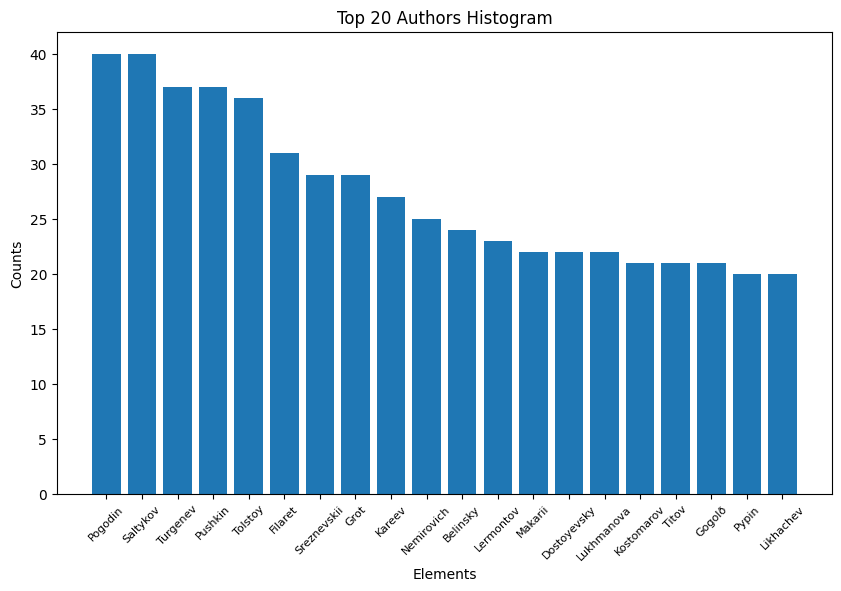

In [60]:
counter = Counter(df_non_nan_pre1900['normalized_author'].tolist())

# Get the top k elements (e.g., top 2)
k = 20
top_k = counter.most_common(k)

# Separate the elements and their counts
elements, counts = zip(*top_k)
print(elements)
elements = [element.split(', ')[0] for element in elements]
elements = [element.split('-')[0] for element in elements]

plt.figure(figsize=(10, 6))

# Plot the histogram
plt.bar(elements, counts)
plt.xlabel('Elements')
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('Counts')
plt.title(f'Top {k} Authors Histogram')
plt.show()